# Jay Parmar

# Topic : Iris Flowers Classification

## Introduction :

●  Iris flower classification is a very popular machine learning project. The iris dataset contains three classes of flowers, Versicolor, Setosa, Virginica, and each class contains 4 features, ‘Sepal length’, ‘Sepal width’, ‘Petal length’, ‘Petal width’. The aim of the iris flower classification is to predict flowers based on their specific features.

●  Classification models can be used to predict the dependent variable (class of each flower). Here we are going to use 5 different algorithms for classification namely, K-Nearest Neighbours, GaussianNB, Decision Tree, Support Vector Machine and Linear Regression. Atlast we compare their accuracy to find the suitable classification technique for this problem. The given dataset is seperated into two seperate train and test sets. The train set is used to train the model, and the test set is used to predict the accuracy of each model. Finally, we compare the results and find which model is best for this project.

## Import required libraries :

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from warnings import filterwarnings
filterwarnings(action='ignore')

## Iris Data Set :

In [2]:
df = pd.read_csv('iris.csv')
df.head(150)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


## Exploratory Data Analysis (EDA) :

In [3]:
df = pd.read_csv('Iris.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
print(df.describe())

       Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [5]:
n = len(df[df['Class'] == 'Setosa'])
print("No of Setosa in Dataset:",n)

No of Setosa in Dataset: 50


In [6]:
n1 = len(df[df['Class'] == 'Versicolor'])
print("No of Versicolor in Dataset:",n1)

No of Versicolor in Dataset: 50


In [7]:
n2 = len(df[df['Class'] == 'Virginica'])
print("No of Virginica in Dataset:",n2)

No of Virginica in Dataset: 50


## Data Visualisation :

### Pie Chart :

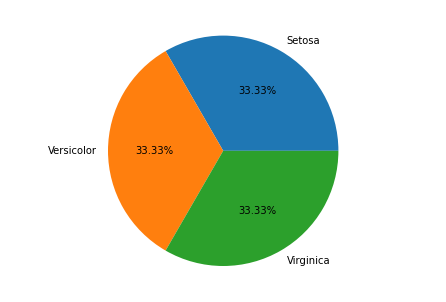

In [8]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Setosa', 'Versicolor', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

### Bar Plot :

Text(0.5, 1.0, 'Petal Width')

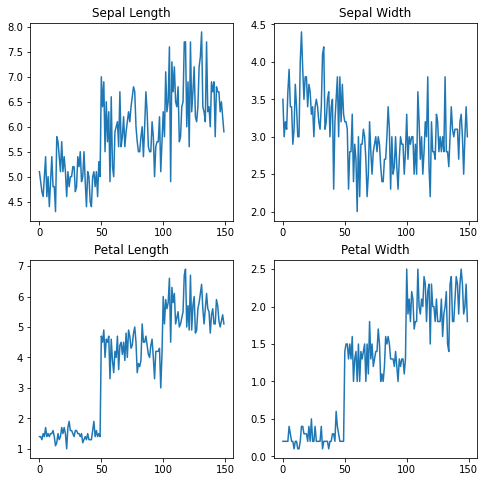

In [9]:
fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

df['Sepal_Length'].plot.line(ax=ax[0][0])
ax[0][0].set_title('Sepal Length')

df['Sepal_Width'].plot.line(ax=ax[0][1])
ax[0][1].set_title('Sepal Width')

df['Petal_Length'].plot.line(ax=ax[1][0])
ax[1][0].set_title('Petal Length')

df['Petal_Width'].plot.line(ax=ax[1][1])
ax[1][1].set_title('Petal Width')

### Histogram :

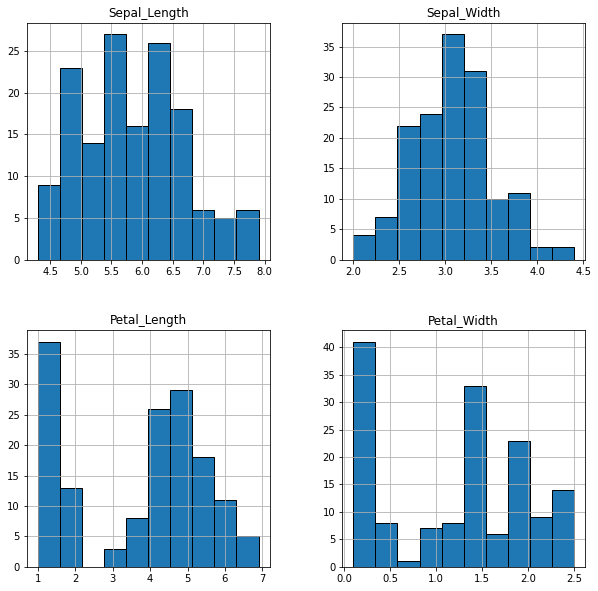

In [10]:
df.hist(edgecolor='black', figsize=(10,10))
plt.show()

### Scatter Plot :

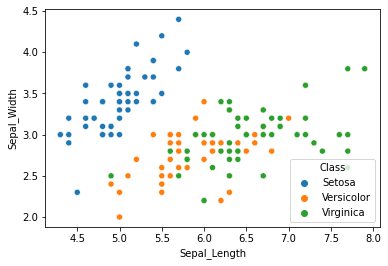

In [11]:
sns.scatterplot(x='Sepal_Length', y='Sepal_Width', data=df, hue='Class')
plt.show()

### Pair Plot :

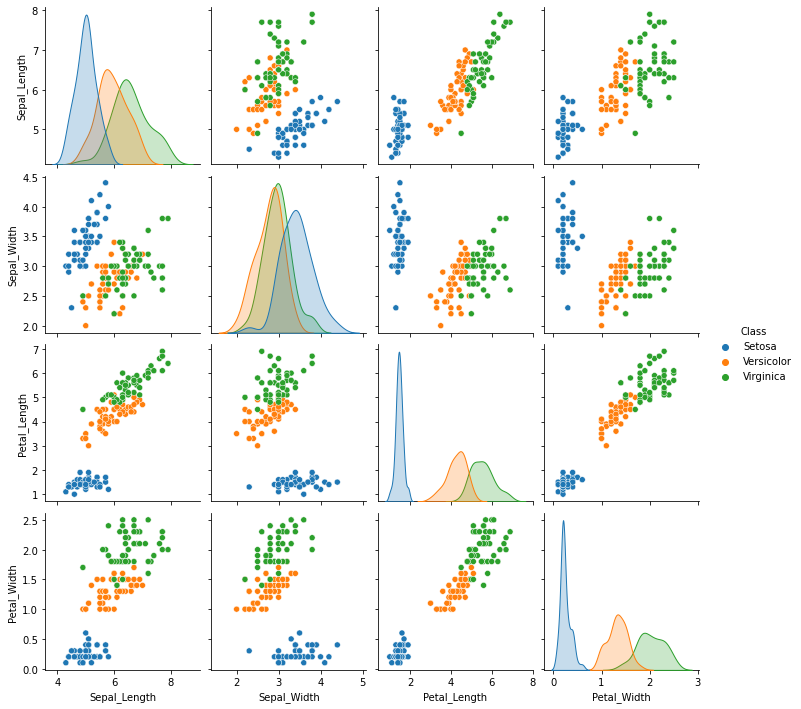

In [12]:
sns.pairplot(df, hue='Class')
plt.show()

## Classification Models :

### Import Modules :

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Split the dataset into a training set and a testing set :

In [14]:
train, test = train_test_split(df, test_size = 0.25)
print(train.shape)
print(test.shape)

(112, 5)
(38, 5)


In [15]:
train_X = train[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']]
train_y = train.Class

test_X = test[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']]
test_y = test.Class

In [16]:
train_X.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
77,6.7,3.0,5.0,1.7
27,5.2,3.5,1.5,0.2
45,4.8,3.0,1.4,0.3
40,5.0,3.5,1.3,0.3
141,6.9,3.1,5.1,2.3


In [17]:
test_y.head()

120    Virginica
134    Virginica
6         Setosa
136    Virginica
149    Virginica
Name: Class, dtype: object

### Function to plot the confusion matrix :

In [18]:
def confusion_matrix_plot(y):
    labels = ['Setosa', 'Versicolor', 'Virginica']

    matrix = confusion_matrix(y, test_y, labels=labels)

    fig, ax = plt.subplots(figsize=(4,4))
    ax = sns.heatmap(matrix, annot = True, xticklabels = labels, yticklabels = labels, cmap = "Greens")
    ax.set_title("Confusion Matrix", fontsize=18)
    ax.set_xlabel("Predicted", fontsize=14)
    ax.set_ylabel("Actual", fontsize=14)

### Logistic Regression :

Accuracy : 0.9736842105263158
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       0.92      1.00      0.96        12
   Virginica       1.00      0.94      0.97        16

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.98        38
weighted avg       0.98      0.97      0.97        38



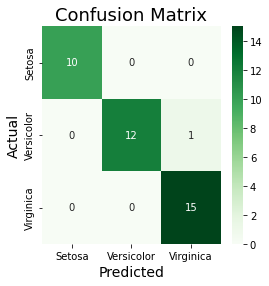

In [19]:
#Using LogisticRegression
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(train_X, train_y)
y_pred1 = model1.predict(test_X)

print('Accuracy :', accuracy_score(test_y, y_pred1))
confusion_matrix_plot(y_pred1)
print(classification_report(test_y, y_pred1))

### Support Vector Classifier :

Accuracy : 0.9473684210526315
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       0.86      1.00      0.92        12
   Virginica       1.00      0.88      0.93        16

    accuracy                           0.95        38
   macro avg       0.95      0.96      0.95        38
weighted avg       0.95      0.95      0.95        38



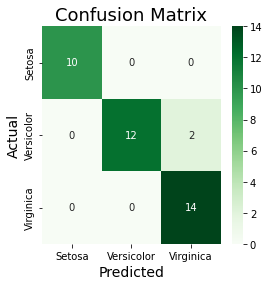

In [20]:
#Using Support Vector
from sklearn.svm import SVC
model2 = SVC()
model2.fit(train_X,train_y)
y_pred2 = model2.predict(test_X)

print("Accuracy :", accuracy_score(test_y, y_pred2))
confusion_matrix_plot(y_pred2)
print(classification_report(test_y, y_pred2))

### K Nearest Neighbors :

Accuracy Score : 0.9736842105263158
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       0.92      1.00      0.96        12
   Virginica       1.00      0.94      0.97        16

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.98        38
weighted avg       0.98      0.97      0.97        38



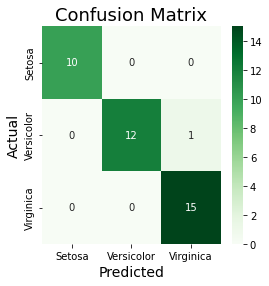

In [21]:
#Using KNN Neighbors
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier(n_neighbors=5)
model3.fit(train_X,train_y)
y_pred3 = model3.predict(test_X)

print("Accuracy Score :", accuracy_score(test_y, y_pred3))
confusion_matrix_plot(y_pred3)
print(classification_report(test_y, y_pred3))

### GaussianNB :

Accuracy : 0.9473684210526315
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       0.86      1.00      0.92        12
   Virginica       1.00      0.88      0.93        16

    accuracy                           0.95        38
   macro avg       0.95      0.96      0.95        38
weighted avg       0.95      0.95      0.95        38



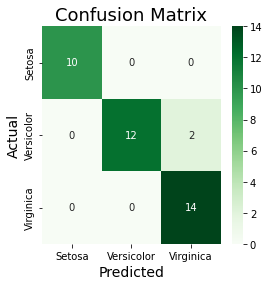

In [22]:
#Using GaussianNB
from sklearn.naive_bayes import GaussianNB
model4 = GaussianNB()
model4.fit(train_X,train_y)
y_pred4 = model4.predict(test_X)

print("Accuracy :", accuracy_score(test_y,y_pred4))
confusion_matrix_plot(y_pred4)
print(classification_report(test_y, y_pred4))

### Decision Tree :

Accuracy : 0.9473684210526315
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       0.92      0.92      0.92        12
   Virginica       0.94      0.94      0.94        16

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



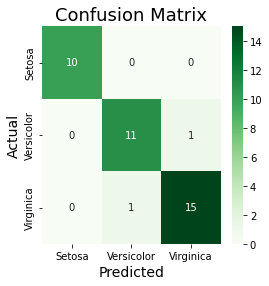

In [23]:
#Using Decision Tree
from sklearn.tree import DecisionTreeClassifier
model5 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model5.fit(train_X,train_y)
y_pred5 = model5.predict(test_X)

print("Accuracy :", accuracy_score(test_y,y_pred5))
confusion_matrix_plot(y_pred5)
print(classification_report(test_y, y_pred5))

### Accuracy comparision for various models :

In [24]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'KNN' , 'GaussianNB', 'Decision Tree'],
    'Score': [0.973,0.947,0.973,0.947,0.947]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head()

,Model
Score,
0.973,Logistic Regression
0.973,KNN
0.947,Support Vector Machines
0.947,GaussianNB
0.947,Decision Tree


## Conclusion :

●    The purpose of this project is to compare different classification algorithms to predict the class of the iris flowers. Find and compare the accuracy of each model to find the best classification algorithm.

●    From above table we can say that Logistic Regression and KNN is the best model for iris classification problem